In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_preprocessing_utilities as dp
import data_eda_utilities as de

In [2]:
df_cancellations = pd.read_csv("../Data/flights_sample_3m.csv")
dp.print_head(df_cancellations)

      FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0             Newark, NJ  ...       0.0             186.0         176.0   
1            S

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dp.print_shape(df_cancellations)

No of rows = 3000000 , No of columns = 32


In [5]:
dp.print_null_count(df_cancellations)

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [6]:
dp.print_dtypes(df_cancellations)

FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER   

In [7]:
# convert to datetime
df_cancellations['FL_DATE'] = pd.to_datetime(df_cancellations['FL_DATE'])

df_cancellations.drop('AIRLINE_DOT', axis=1, inplace=True)

df_cancellations['DELAY_DUE_CARRIER'] = df_cancellations['DELAY_DUE_CARRIER'].fillna(0)
df_cancellations['DELAY_DUE_WEATHER'] = df_cancellations['DELAY_DUE_WEATHER'].fillna(0)
df_cancellations['DELAY_DUE_NAS'] = df_cancellations['DELAY_DUE_NAS'].fillna(0)
df_cancellations['DELAY_DUE_SECURITY'] = df_cancellations['DELAY_DUE_SECURITY'].fillna(0)
df_cancellations['DELAY_DUE_LATE_AIRCRAFT'] = df_cancellations['DELAY_DUE_LATE_AIRCRAFT'].fillna(0)

df_cancellations = dp.handle_nulls_by_column(df_cancellations, column='DEP_TIME', mode='drop')
df_cancellations = dp.handle_nulls_by_column(df_cancellations, column='TAXI_OUT', mode='drop')
df_cancellations = dp.handle_nulls_by_column(df_cancellations, column='WHEELS_OFF', mode='drop')
df_cancellations = dp.handle_nulls_by_column(df_cancellations, column='WHEELS_ON', mode='drop')
df_cancellations = dp.handle_nulls_by_column(df_cancellations, column='TAXI_IN', mode='drop')
df_cancellations = dp.handle_nulls_by_column(df_cancellations, column='ARR_TIME', mode='drop')

dp.handle_nulls_by_column(df_cancellations, column='CRS_ELAPSED_TIME', mode='delete')

df_cancellations['DEP_DELAY'].fillna(df_cancellations['DEP_DELAY'].max(), inplace=True)
df_cancellations['ARR_DELAY'].fillna(df_cancellations['ARR_DELAY'].max(), inplace=True)
df_cancellations['ELAPSED_TIME'].fillna(df_cancellations['ELAPSED_TIME'].max(), inplace=True)
df_cancellations['AIR_TIME'].fillna(df_cancellations['AIR_TIME'].max(), inplace=True)

df_cancellations = dp.handle_nulls_by_column(df_cancellations, column='CANCELLATION_CODE', mode='drop')

/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_91542/4040464941.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cancellations['DEP_DELAY'].fillna(df_cancellations['DEP_DELAY'].max(), inplace=True)
/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_91542/4040464941.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

In [8]:
dp.summarize_data(df_cancellations, columns=['DEP_DELAY', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
                                             'AIR_TIME', 'DISTANCE'], stats=['mean', 'median', 'std', 'IQR', 'range', 'min', 'max'])

*********** Dataset summary of numerical columns ***********
                   min     max   range        mean  median         std    IQR
DEP_DELAY        -90.0  2966.0  3056.0   86.625356    -2.0  471.848534   14.0
ARR_DELAY        -96.0  2934.0  3030.0   88.440076    -6.0  492.016977   24.0
CRS_ELAPSED_TIME   1.0   705.0   704.0  142.275807   125.0   71.556690   82.0
ELAPSED_TIME      15.0   739.0   724.0  153.928509   122.0  122.948008   88.0
AIR_TIME           8.0   692.0   684.0  128.966855    98.0  118.759523   85.0
DISTANCE          29.0  5812.0  5783.0  809.361552   651.0  587.893938  669.0


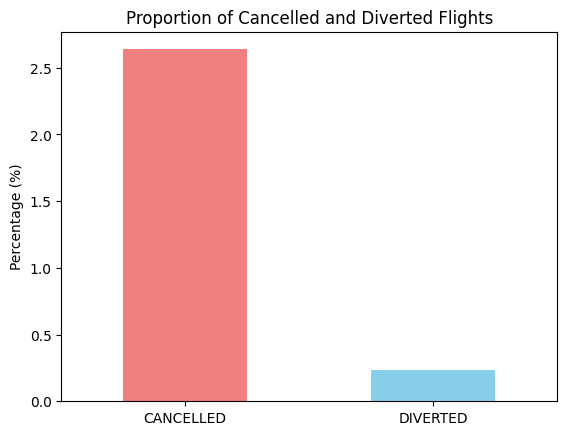

In [9]:
# Visualisations
cancel_divert = df_cancellations[['CANCELLED', 'DIVERTED']].mean() * 100
cancel_divert.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Proportion of Cancelled and Diverted Flights')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()

# Flight cancellations occur at a significantly higher rate than diversions, indicating that operational issues more often result in cancellations rather than rerouting.

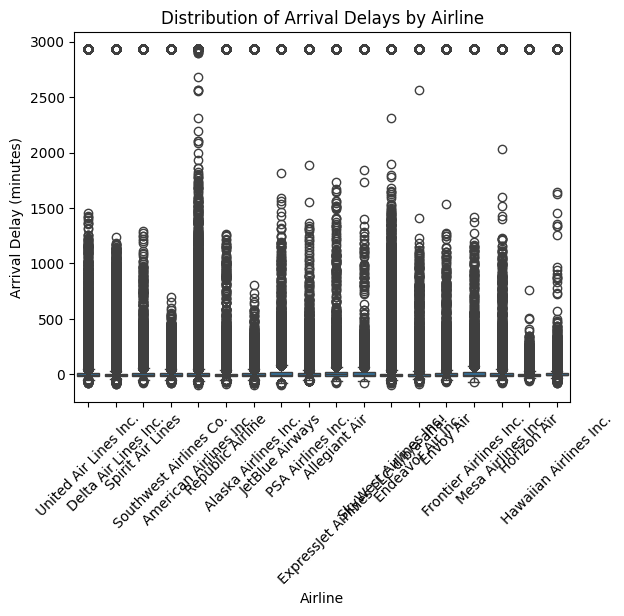

In [10]:
sns.boxplot(data=df_cancellations, x='AIRLINE', y='ARR_DELAY')
plt.title('Distribution of Arrival Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Most airlines experience a wide range of arrival delays, with significant outliers suggesting occasional extreme delays affecting certain carriers more than others.

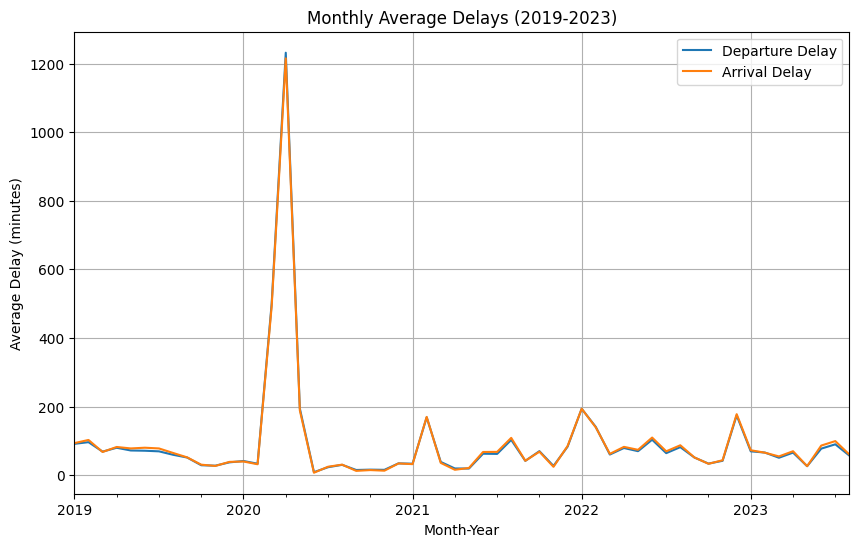

In [11]:
df_cancellations['FL_DATE'] = pd.to_datetime(df_cancellations['FL_DATE'])
df_cancellations['Month_Year'] = df_cancellations['FL_DATE'].dt.to_period('M')
monthly_delays = df_cancellations.groupby('Month_Year')[['DEP_DELAY', 'ARR_DELAY']].mean()
monthly_delays.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Average Delays (2019-2023)')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Month-Year')
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.grid()
plt.show()

# A major spike in delays occurred in early 2020, likely due to the COVID-19 pandemic, while delays remained relatively stable in the following years with periodic fluctuations.

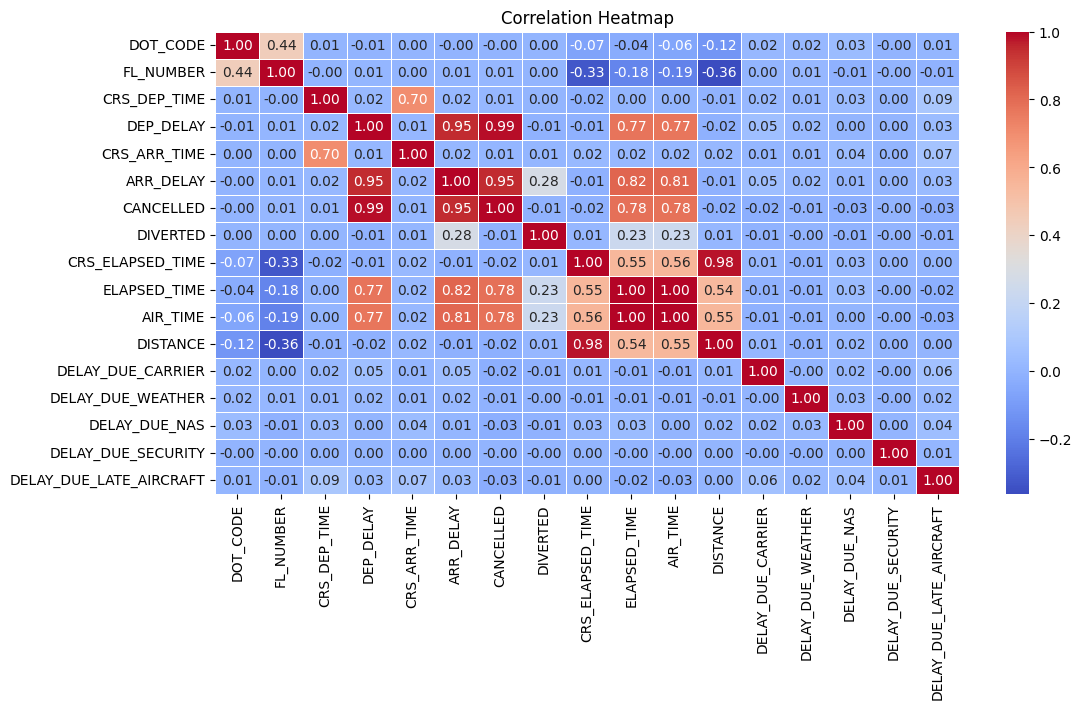

In [12]:
de.draw_correlation_heatmap(df_cancellations)

Skewness:
 DEP_DELAY           5.884703
ARR_DELAY           5.559258
CRS_ELAPSED_TIME    1.432761
ELAPSED_TIME        3.225081
AIR_TIME            3.201709
DISTANCE            1.498054
dtype: float64


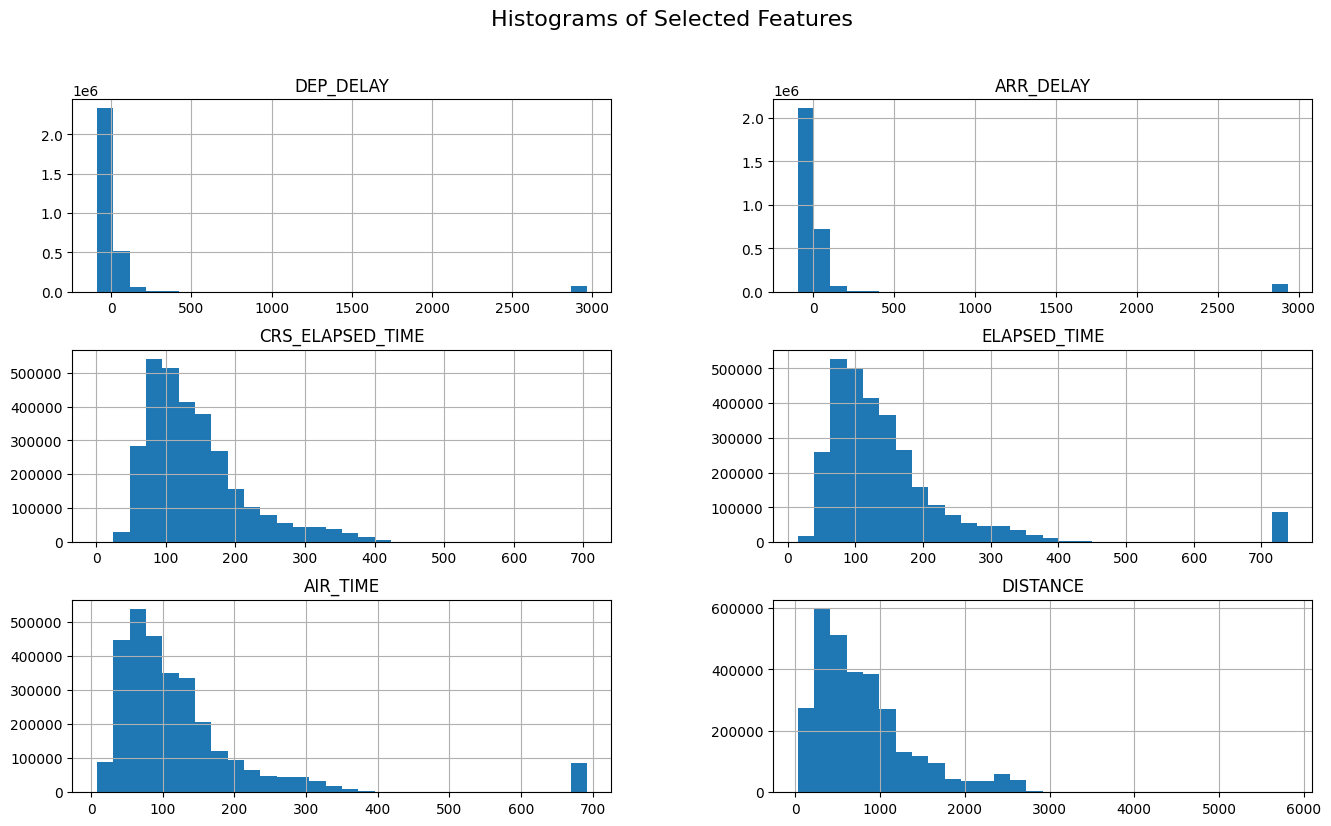

In [13]:
selected_cols = ['DEP_DELAY', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
                 'AIR_TIME', 'DISTANCE']
de.draw_skewness_histogram(df_cancellations, selected_cols=selected_cols)

In [14]:
num_cols = ['DEP_DELAY', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
            'AIR_TIME', 'DISTANCE']

de.print_outliers(df_cancellations, num_cols=num_cols)

df_cancellations = de.cap_outliers(df_cancellations, 'DEP_DELAY')
df_cancellations = de.cap_outliers(df_cancellations, 'ARR_DELAY')
df_cancellations = de.cap_outliers(df_cancellations, 'CRS_ELAPSED_TIME')
df_cancellations = de.cap_outliers(df_cancellations, 'ELAPSED_TIME')
df_cancellations = de.cap_outliers(df_cancellations, 'AIR_TIME')
df_cancellations = de.cap_outliers(df_cancellations, 'DISTANCE')

print()

de.print_outliers(df_cancellations, num_cols=num_cols)

DEP_DELAY: 420916 outliers detected (14.03%)
ARR_DELAY: 323190 outliers detected (10.77%)
CRS_ELAPSED_TIME: 154277 outliers detected (5.14%)
ELAPSED_TIME: 204308 outliers detected (6.81%)
AIR_TIME: 213215 outliers detected (7.11%)
DISTANCE: 168407 outliers detected (5.61%)

DEP_DELAY: 0 outliers detected (0.0%)
ARR_DELAY: 0 outliers detected (0.0%)
CRS_ELAPSED_TIME: 0 outliers detected (0.0%)
ELAPSED_TIME: 0 outliers detected (0.0%)
AIR_TIME: 0 outliers detected (0.0%)
DISTANCE: 0 outliers detected (0.0%)


In [15]:
num_cols = ['DEP_DELAY', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
            'AIR_TIME', 'DISTANCE']
df_cancellations[num_cols] = de.scale_df(df_cancellations, selected_columns=num_cols, type='scalar')

In [16]:
df_cancellations.to_csv("../Data/flights_sample_3m.csv")